In [20]:
import collections

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics

%matplotlib inline

In [4]:
df = pd.read_table('p_vs_rank.tsv.gz')

uniprot_to_degree = collections.Counter(df.groupby('uniprot_a')['string'].sum().to_dict()) \
    + collections.Counter(df.groupby('uniprot_b')['string'].sum().to_dict())

# Node pair "degree" as the geometric mean of source and target degree
df['degree'] = np.sqrt(df['uniprot_a'].map(uniprot_to_degree) * df['uniprot_b'].map(uniprot_to_degree))
df['rank_rwr'] = df['rwr'].rank(method='min', ascending=False)
df['rank_p'] = df['p_value'].rank(method='min')

df.head()

,uniprot_a,uniprot_b,string,ht_2014,rwr,p_value,degree,rank_rwr,rank_p
0,A4D1E9,A4D1E9,0.0,0.0,0.252469,0.094,120.000000,620.0,301388.0
1,A4D1E9,O00144,0.0,0.0,0.000366,0.212,120.000000,825083.0,486708.0
2,A4D1E9,O00148,1.0,0.0,0.004661,0.000,250.279843,18407.0,1.0
3,A4D1E9,O00151,1.0,0.0,0.003500,0.002,150.199867,32547.0,64209.0
4,A4D1E9,O00160,0.0,0.0,0.000452,1.000,171.813853,657213.0,1634682.0


In [5]:
comparison_df = df.query('string != 1 and degree > 0')

### AUC

In [6]:
sklearn.metrics.roc_auc_score(comparison_df['ht_2014'], comparison_df['rwr'])

0.5309644417799493

In [9]:
sklearn.metrics.roc_auc_score(comparison_df['ht_2014'], -comparison_df['p_value'])

0.5751426187192985

### Correlation of prediction values with degree

In [14]:
scipy.stats.spearmanr(comparison_df['degree'], 
                      comparison_df['rwr'])

SpearmanrResult(correlation=0.6348450104438284, pvalue=0.0)

In [15]:
scipy.stats.spearmanr(comparison_df['degree'], 
                      comparison_df['p_value'])

SpearmanrResult(correlation=0.1299839707061305, pvalue=0.0)

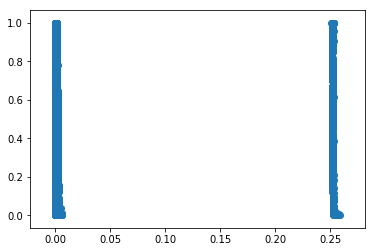

In [16]:
plt.scatter(comparison_df['rwr'], comparison_df['p_value'])

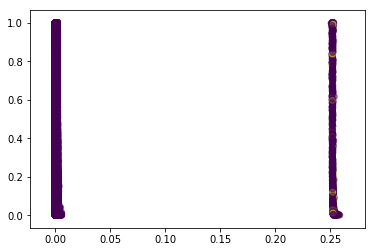

In [18]:
plt.scatter(x='rwr', y='p_value', c='ht_2014', data=comparison_df, alpha=0.5)

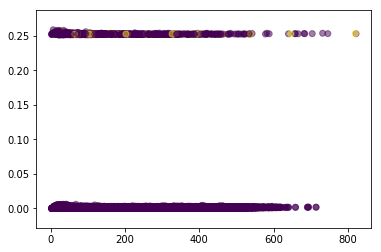

In [19]:
plt.scatter(x='degree', y='rwr', c='ht_2014', data=comparison_df, alpha=0.5)

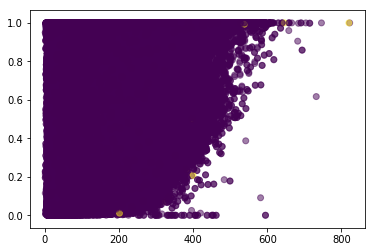

In [21]:
plt.scatter(x='degree', y='p_value', c='ht_2014', data=comparison_df, alpha=0.5)